In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier


In [11]:
def plt_corner(data,Tclass,feature_names):
    #This function make a corner plot of all the features of the dataset, and have as color code the quality of the wine, which is what we want to predict.
    pts=1
    nb_row=data.shape[1]
    fig, Tax = plt.subplots(nb_row,nb_row)
    fig.suptitle('dataset')
    fig.set_size_inches(10,10)

    for k in range(nb_row):
        for l in range(nb_row):
            if l<k:
               im1=Tax[k,l].scatter(data[:,l],data[:,k],c=Tclass,s=pts,cmap='jet')
            else:
                Tax[k,l].set_axis_off()
            if k==nb_row-1:
                Tax[k,l].set_xlabel(feature_names[l],rotation=45)
            if l==0:
                Tax[k,l].set_ylabel(feature_names[k],rotation=75)
    for ax in fig.get_axes():
        ax.label_outer()


We now load the dataset, and have a look at the data using the plt_corner function defined above

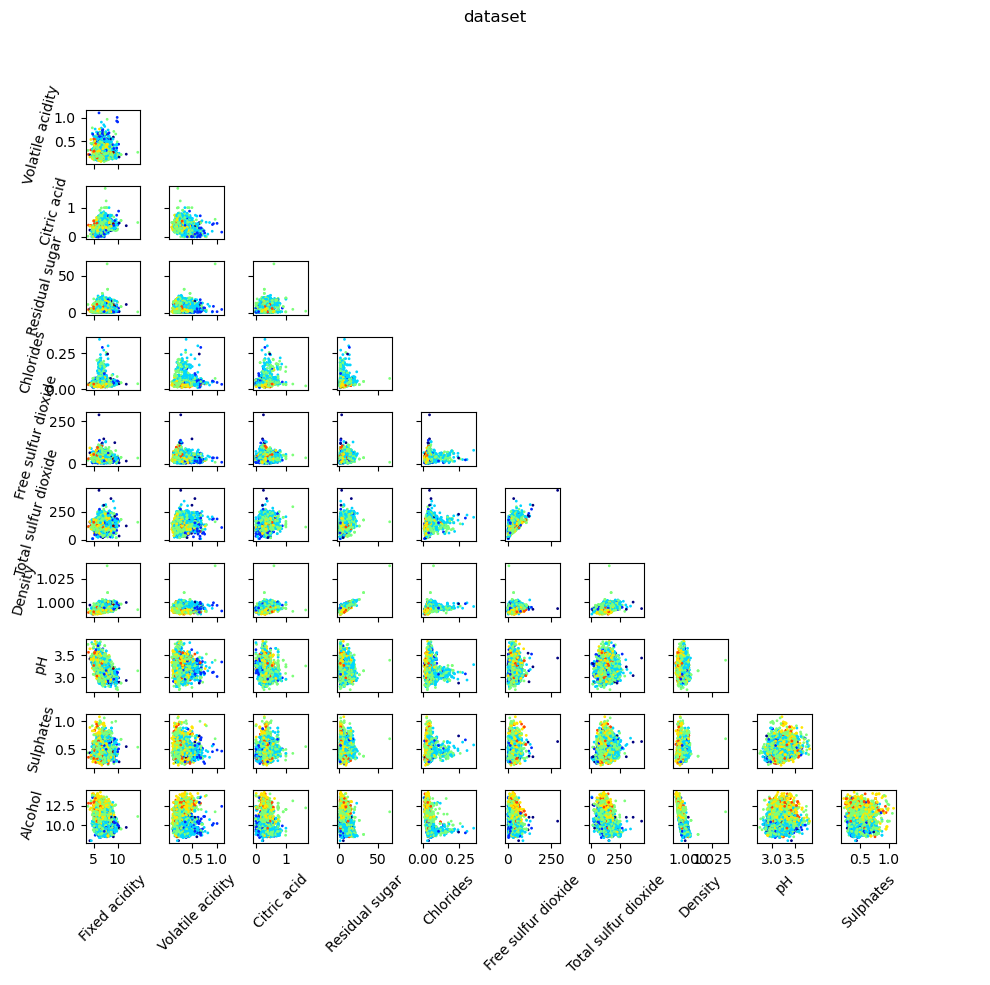

In [12]:
Tdata=np.genfromtxt("winequality-white.csv",delimiter=';')

random.seed(2)
np.random.shuffle(Tdata)
X=Tdata[:,:-1]
Tclass=Tdata[:,-1]

feature_names=['Fixed acidity',
'Volatile acidity',
'Citric acid',
'Residual sugar',
'Chlorides',
'Free sulfur dioxide',
'Total sulfur dioxide',
'Density',
'pH',
'Sulphates',
'Alcohol']


plt_corner(X,Tclass,feature_names)
plt.tight_layout()
plt.savefig('wine.png')

We also have a look at the distibution of wine quality in the sample

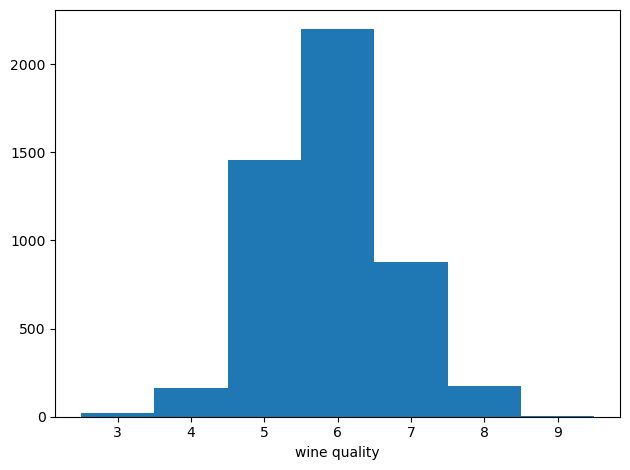

In [13]:


plt.figure()
bins=np.arange(2.5,9.8,1)
plt.hist(Tclass,bins=bins)
plt.xlabel('wine quality')
plt.tight_layout()
plt.savefig('wine_quality.png')

We now define the labels y, whild is either 1, or True for a wine whose qality if above 5, or 0, or False, for a whine whose quality is of 5 or less

In [14]:
output_names=['wine quality']

y=Tclass>5.5




We then cut our dataset in a 'training set' and a 'validation set'

In [15]:

X_train,y_train=X[:4000,:], y[:4000]
X_validation,y_validation=X[4000:,:],y[4000:]
quality_validation=Tclass[4000:]

We create the random forest, with n_estimators trees, and the maximum depth, or layers of nodes, for each tree

In [16]:
n_estimators=1
max_depth=3
forest = RandomForestClassifier(n_estimators,verbose=0,max_depth=max_depth)

We can the train the forest on the training set

In [17]:
forest.fit(X_train,y_train)


RandomForestClassifier(max_depth=3, n_estimators=1)

We can the compute the score of the trained random forest on the validation data set

In [18]:
score_training=forest.score(X_train,y_train)
score_validation=forest.score(X_validation,y_validation)

print('score_training',score_training)

print('score_validation',score_validation)

score_training 0.71425
score_validation 0.720489977728285


Let us use our trainined forest to predict the label of the validation dataset

In [74]:
y_pred=forest.predict(X_validation)